# Project: Stock Prices Analysis (Finance)

In this data project, I focus on exploratory data analysis of stock prices. We'll look at bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

Prerequisite: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**)*

### Import libraries

In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

I use pandas directly to read data from Google finance using pandas. The data is collected using pandas datareader and looks at stock information for the following banks:
* Bank of America (BAC)
* CitiGroup (C)
* Goldman Sachs (GS)
* JPMorgan Chase (JPM)
* Morgan Stanley (MS)
* Wells Fargo (WFC)

and the following information for each bank's stock:
* Open: Opening price.
* High: Highest price.
* Low: Lowest price.
* Close: Closing price.

I use the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks amd set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [5]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [6]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)
df

Attributes    Close                                                   High  \
Symbols         BAC         C       GS      JPM       MS      WFC      BAC   
Date                                                                         
2006-01-03  39.6217  407.8910  105.883  28.9771  38.2361  22.9581  39.7023   
2006-01-04  39.2004  400.3540  104.432  28.5626  38.2675  22.6917  39.7592   
2006-01-05  39.2525  402.3210  104.394  28.6520  38.3715  22.6690  39.4126   
2006-01-06  39.1917  402.3210  105.855  28.8543  38.4108  22.7983  39.4774   
2006-01-09  39.2181  400.4320  107.128  29.3229  38.8120  22.7983  39.5294   
...             ...       ...      ...      ...      ...      ...      ...   
2015-12-24  15.0063   43.9089  160.353  54.7162  27.0811  44.7054  15.1035   
2015-12-28  14.8846   43.6347  159.599  54.5364  26.8211  44.5949  14.9720   
2015-12-29  15.0131   44.1369  161.264  55.0983  27.1380  45.0893  15.0780   
2015-12-30  14.8168   43.5692  159.923  54.7072  26.8721  44.7636  14.9807   
2015-12-31  14.6233   43.1101  158.373  54.2504  26.5229  44.3324  14.8325   

Attributes                              ...     Open                    \
Symbols            C       GS      JPM  ...       GS      JPM       MS   
Date                                    ...                              
2006-01-03  408.6150  106.354  29.0970  ...  104.109  28.7148  37.4934   
2006-01-04  406.3250  105.922  28.9428  ...  104.609  28.6824  38.4971   
2006-01-05  403.6630  104.599  28.7030  ...  103.531  28.5556  38.2675   
2006-01-06  404.6410  106.187  29.0125  ...  104.579  28.7846  38.5432   
2006-01-09  403.3290  107.323  29.3593  ...  105.560  28.7522  38.4470   
...              ...      ...      ...  ...      ...      ...      ...   
2015-12-24   44.1281  160.951  54.9529  ...  160.168  54.7338  27.1547   
2015-12-28   43.7934  159.844  54.5904  ...  159.717  54.4588  26.9820   
2015-12-29   44.3357  161.844  55.2889  ...  160.657  54.9126  27.0448   
2015-12-30   44.1027  161.264  55.0836  ...  161.060  55.0767  27.0998   
2015-12-31   43.6426  160.717  54.8616  ...  159.197  54.3802  26.6023   

Attributes                 Volume                                            \
Symbols         WFC           BAC             C            GS           JPM   
Date                                                                          
2006-01-03  22.7430  1.936396e+07  1.858097e+06  7.508235e+06  1.780695e+07   
2006-01-04  22.8831  2.110031e+07  2.260921e+06  5.917173e+06  1.871252e+07   
2006-01-05  22.6690  1.761312e+07  1.371893e+06  4.521468e+06  1.118271e+07   
2006-01-06  22.7302  1.496529e+07  1.655812e+06  5.257604e+06  1.104151e+07   
2006-01-09  22.7983  1.855918e+07  2.031072e+06  5.749209e+06  2.298942e+07   
...             ...           ...           ...           ...           ...   
2015-12-24  44.8298  3.380344e+07  5.607320e+06  1.260485e+06  5.438811e+06   
2015-12-28  44.4854  4.803435e+07  1.051593e+07  1.961148e+06  8.046338e+06   
2015-12-29  44.9422  5.251059e+07  1.218830e+07  2.104001e+06  1.195386e+07   
2015-12-30  45.0735  4.030734e+07  1.051787e+07  1.723319e+06  8.751596e+06   
2015-12-31  44.4568  5.417059e+07  1.353052e+07  2.018071e+06  1.783536e+07   

Attributes                              
Symbols               MS           WFC  
Date                                    
2006-01-03  6.806387e+06  1.530724e+07  
2006-01-04  1.009857e+07  1.510382e+07  
2006-01-05  7.313990e+06  1.407726e+07  
2006-01-06  8.721337e+06  1.167705e+07  
2006-01-09  5.246244e+06  7.808415e+06  
...                  ...           ...  
2015-12-24  3.356089e+06  6.130267e+06  
2015-12-28  6.501028e+06  1.016352e+07  
2015-12-29  7.661993e+06  9.680671e+06  
2015-12-30  6.065510e+06  9.830145e+06  
2015-12-31  9.773893e+06  1.340161e+07  

[2517 rows x 30 columns]

### Creating a list of ticker symbols in alphabetical order

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
MS

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,26.6023,26.9300,26.4865,26.5229,9.773893e+06
2015-12-30,27.0998,27.2194,26.8476,26.8721,6.065510e+06
2015-12-29,27.0448,27.2656,26.9506,27.1380,7.661993e+06
2015-12-28,26.9820,26.9820,26.6377,26.8211,6.501028e+06
2015-12-24,27.1547,27.2734,27.0448,27.0811,3.356089e+06
...,...,...,...,...,...
2006-01-09,38.4470,38.8846,38.4412,38.8120,5.246244e+06
2006-01-06,38.5432,38.5922,38.0703,38.4108,8.721337e+06
2006-01-05,38.2675,38.4264,38.0448,38.3715,7.313990e+06


### Creating a single data frame, bank_stocks, by concatenating all the banks' dataframes together

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [10]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2516 non-null   float64
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2513 non-null   float64
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2516 non-null   float64
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

### Setting levels of the column name 

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [12]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

# Exploratory Data Analysis

### Checking for the maximum Close price for each bank's stock throughout the time period

In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

### Creating a DataFrame that contains the returns for each bank's stock typically defined by:
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


In [14]:
returns = pd.DataFrame()

### Creating a column representing this return value using pandas pct_change() method and for loop

In [15]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


### Checking for any behavioural pattern using a pair plot using seaborn

Note: Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

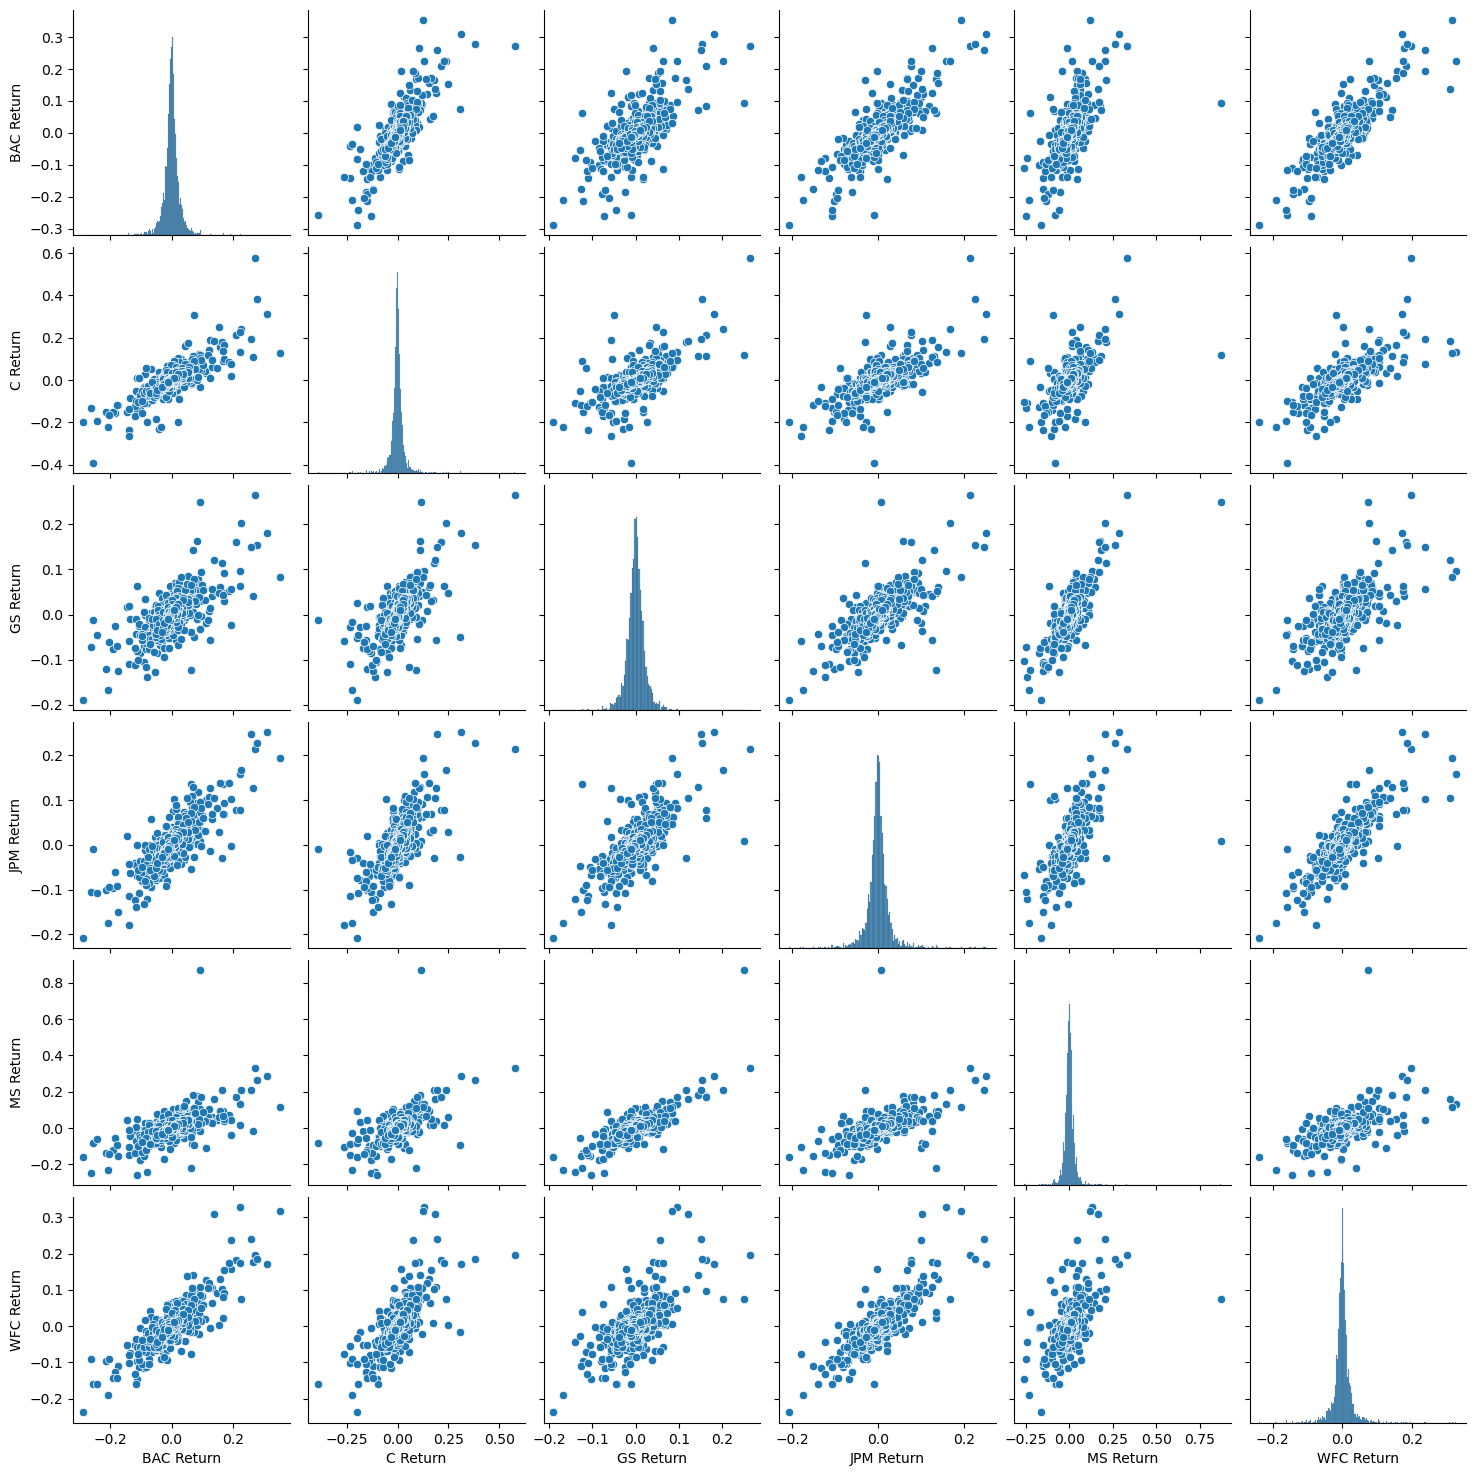

In [16]:
import seaborn as sns
sns.pairplot(returns[1:])

### Checking what dates each bank stock had the best and worst single day returns 

In [17]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

#### - _What is so special about the dates in 2009?_

_Big political change - [President Barack Obama's Inaugural Date](https://obamawhitehouse.archives.gov/blog/2009/01/21/president-barack-obamas-inaugural-address)_

_JPM's biggest return date is the very next day - 2009-01-21_

In [18]:
# Best Single Day Gain
returns.idxmax()
# citigroup stock split in May 2011, but also JPM day after inauguration.

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

_We notice that Citigroup's largest drop and biggest gain were very close to one another, why?_ 

_[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)_

### Analyzing the riskiest stock using standard deviations 

In [19]:
returns.std() # Citigroup riskiest

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

#### - _Largest standard deviation implies it is the riskiest stock i.e. Citigroup_

In [20]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

#### - _In 2015 we see very similar risk profiles with Wells Fargo as the least risky_

### Creating a distplot using seaborn of the 2015 returns for Morgan Stanley

C:\Users\awake\AppData\Local\Temp\ipykernel_19396\1023652126.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)


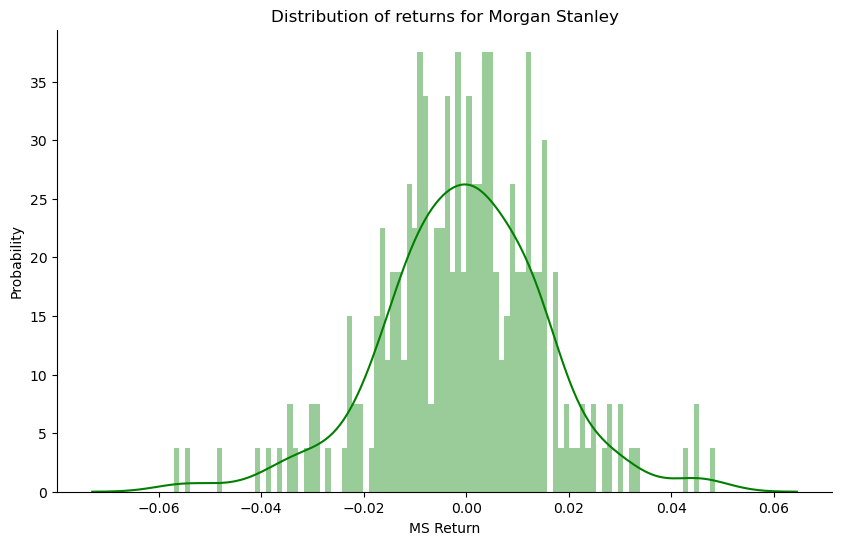

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.set_ylabel('Probability')  # add the y-axis label

ax.set_title('Distribution of returns for Morgan Stanley')

plt.savefig('fin_1.png')

plt.show()

### Creating a distplot using seaborn of the 2008 returns for CitiGroup

C:\Users\awake\AppData\Local\Temp\ipykernel_19396\641365462.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


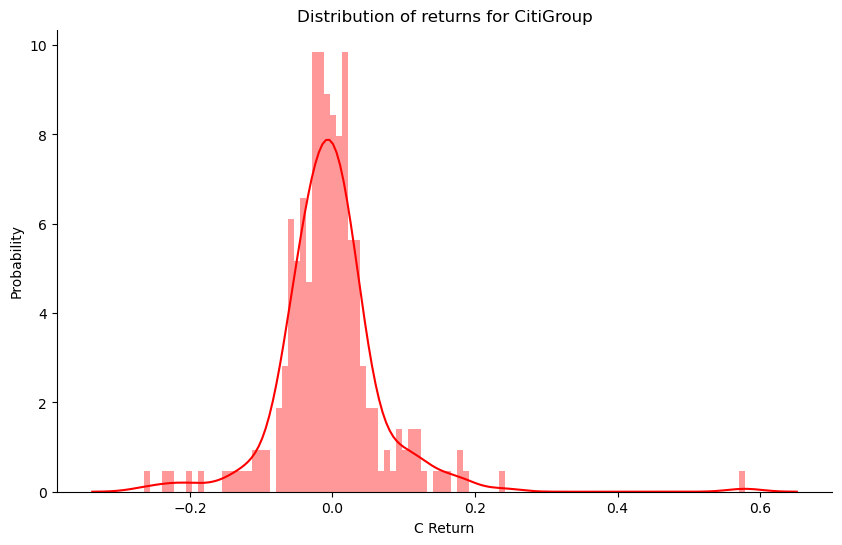

In [24]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

ax.spines['right'].set_visible(False) # get ride of the line on the right
ax.spines['top'].set_visible(False)   # get rid of the line on top

ax.set_ylabel('Probability')  # add the y-axis label

ax.set_title('Distribution of returns for CitiGroup')

plt.savefig('fin_2.png')

plt.show()

In [25]:
returns.loc['2008-01-01':'2008-12-31'].std()

BAC Return    0.062928
C Return      0.073492
GS Return     0.050116
JPM Return    0.053133
MS Return     0.087620
WFC Return    0.052414
dtype: float64

#### - _In 2008, we see the distribution for Citigroup is far bigger than the distribution observed for Morgan Stanley in 2015 which gives us an idea of the financial crisis that the stock experienced._

### Importing additional Visualization libraries

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [27]:
# Optional Plotly Method Imports
import plotly

!pip install cufflinks
import cufflinks as cf
cf.go_offline()

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



### Creating a line plot showing Close price for each bank for the entire index of time using for loop

for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [28]:
import plotly.io as pio
import chart_studio
import plotly.express as px
import chart_studio.plotly as py
import chart_studio.tools as tls

In [29]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

### Interactive plot

In [30]:
import chart_studio
import plotly.express as px
import chart_studio.plotly as py
import chart_studio.tools as tls

In [31]:
# plotly
dfp=bank_stocks.xs(key='Close',axis=1,level='Stock Info')
dfp

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,39.6217,407.8910,105.883,28.9771,38.2361,22.9581
2006-01-04,39.2004,400.3540,104.432,28.5626,38.2675,22.6917
2006-01-05,39.2525,402.3210,104.394,28.6520,38.3715,22.6690
2006-01-06,39.1917,402.3210,105.855,28.8543,38.4108,22.7983
2006-01-09,39.2181,400.4320,107.128,29.3229,38.8120,22.7983
...,...,...,...,...,...,...
2015-12-24,15.0063,43.9089,160.353,54.7162,27.0811,44.7054
2015-12-28,14.8846,43.6347,159.599,54.5364,26.8211,44.5949
2015-12-29,15.0131,44.1369,161.264,55.0983,27.1380,45.0893


In [32]:
plot2 = px.line(dfp, labels={'value':'Closing price', 'Date':'Year'}, title='Closing Price of Stocks ',
       template='plotly_white')

In [33]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

#### _We see that the Citigroup stock experienced the biggest shock during the financial crisis._

### Analyzing the moving averages for these stocks in the year 2008. 

#### Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

C:\Users\awake\AppData\Local\Temp\ipykernel_19396\2494955124.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\awake\AppData\Local\Temp\ipykernel_19396\2494955124.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



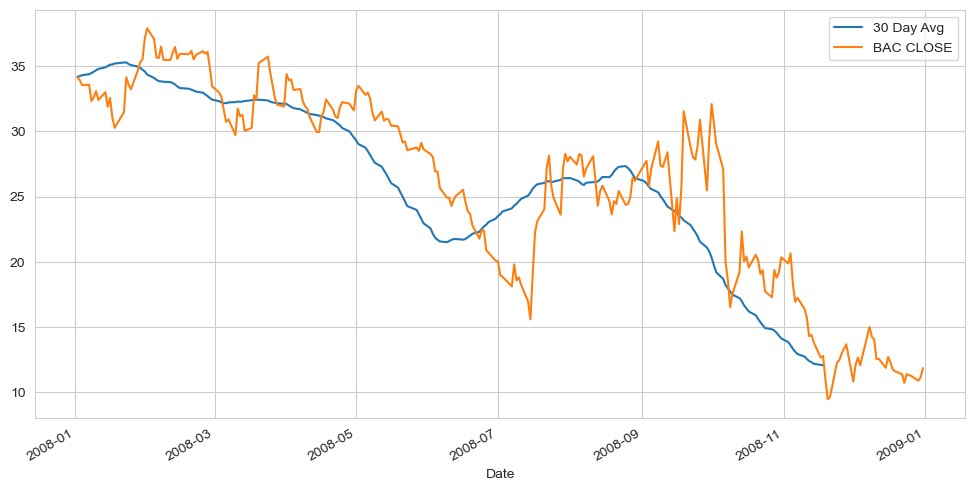

In [34]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

### Creating a heatmap to check the correlation between the Closing Prices of the stocks.

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

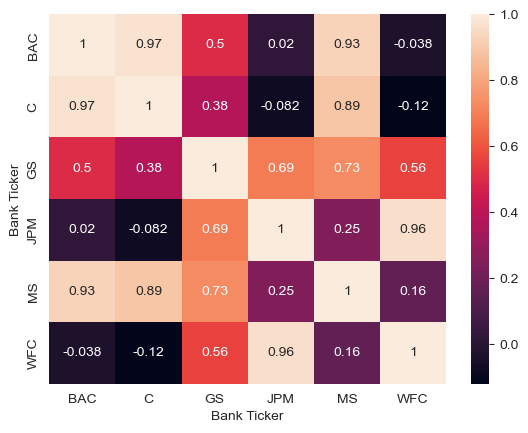

In [35]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

### Using seaborn's clustermap to cluster the correlations together

<Figure size 1200x800 with 0 Axes>

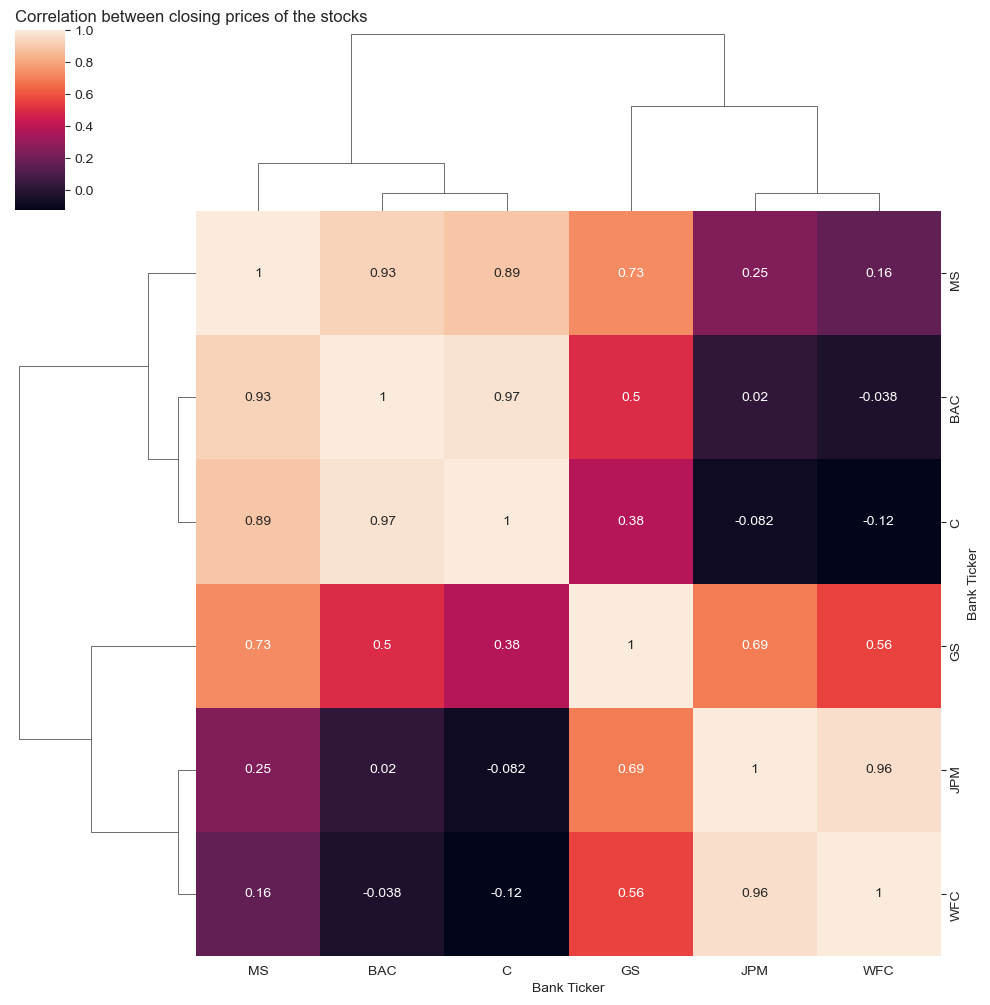

In [36]:
plt.figure(figsize=(12,8))
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

plt.title('Correlation between closing prices of the stocks', loc='left')

plt.savefig('fin_f.png')

#### - _Values in each box represent degree of correlation between the closing prices of stocks of banks on each axis. e.g. there is 93% correlation between the closing prices of stocks for BAC and MS._

#### - _On the x-axis (top): Levels of hierarchical clustering based on similarities in the elements of the rows represented by the tree diagram._

#### - _On the y-axis (left): Hierarchical clustering based on similarities in the elements of the columns represented by the tree diagram._

### Using an Interactive heatmap to check the correlation between the Closing Prices of the stocks.

In [37]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

#### Technical Analysis using .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016
Note: feel free to skip, if any functionality is broken in the future.

In [38]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

C:\Users\awake\AppData\Local\Temp\ipykernel_19396\2707617483.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



# Thank you for exploring this dataset with me!

#### Feel free to check out my data portfolio on my <a href="https://awakekho.github.io/Home.html">personal website</a>. You can also find me <a href="https://www.linkedin.com/in/awake-khobragade/"> (here) on LinkedIn</a>